In [105]:
# Importing necessary libraries
library(dplyr)
library(ggplot2)

#**PART 1: Exploratory Analysis:**

In [106]:
data = read.csv("/content/diabetes_dataset.csv")

# Display the first few rows of the dataset
print("Dataset Preview:")
head(data)

[1] "Dataset Preview:"


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [107]:
# Checking for missing values
cat("\nChecking for missing values:\n")
missing_values <- colSums(is.na(data))
print(missing_values)


Checking for missing values:
             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [108]:
# Basic statistics summary
cat("\nBasic statistics:\n")
print(summary(data))



Basic statistics:
  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81

In [109]:
columns_to_fix <- c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")
data[columns_to_fix] <- lapply(data[columns_to_fix], function(x) ifelse(x == 0, NA, x))

# Fill NA values with the median of each column
data[columns_to_fix] <- lapply(data[columns_to_fix], function(x) ifelse(is.na(x), median(x, na.rm = TRUE), x))
summary(data)


  Pregnancies        Glucose       BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.00   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.75   1st Qu.: 64.00   1st Qu.:25.00  
 Median : 3.000   Median :117.00   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.66   Mean   : 72.39   Mean   :29.11  
 3rd Qu.: 6.000   3rd Qu.:140.25   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.00   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.0   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.:121.5   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median :125.0   Median :32.30   Median :0.3725           Median :29.00  
 Mean   :140.7   Mean   :32.46   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Ou

In [110]:
detect_outliers <- function(column) {
  Q1 <- quantile(column, 0.25, na.rm = TRUE)
  Q3 <- quantile(column, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  sum(column < lower_bound | column > upper_bound, na.rm = TRUE)
}

numerical_columns <- c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age")

outliers <- sapply(data[numerical_columns], detect_outliers)

print(outliers)


      Glucose BloodPressure SkinThickness       Insulin           BMI 
            0            14            87           346             8 
          Age 
            9 


In [111]:
# function to cap outliers using the IQR method
cap_outliers <- function(column) {
  Q1 <- quantile(column, 0.25, na.rm = TRUE)
  Q3 <- quantile(column, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  pmin(pmax(column, lower_bound), upper_bound)
}

# apply to this columns only
columns_to_cap <- c("Glucose", "Insulin", "BMI")
data[columns_to_cap] <- lapply(data[columns_to_cap], cap_outliers)


In [112]:
# function to replace outliers with the mean
replace_outliers_with_mean <- function(column) {
  Q1 <- quantile(column, 0.25, na.rm = TRUE)
  Q3 <- quantile(column, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR

  # replace values outside the bounds with the mean
  column[column < lower_bound | column > upper_bound] <- mean(column, na.rm = TRUE)
  return(column)
}

# apply to this columns only
columns_to_replace <- c("BloodPressure", "SkinThickness")
data[columns_to_replace] <- lapply(data[columns_to_replace], replace_outliers_with_mean)



In [113]:
# check the summary of the cleaned dataset
summary(data)

# save the cleaned dataset
write.csv(data, "cleaned_diabetes_dataset.csv", row.names = FALSE)


  Pregnancies        Glucose       BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.00   Min.   : 40.00   Min.   :15.00  
 1st Qu.: 1.000   1st Qu.: 99.75   1st Qu.: 64.00   1st Qu.:27.00  
 Median : 3.000   Median :117.00   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.66   Mean   : 72.12   Mean   :28.77  
 3rd Qu.: 6.000   3rd Qu.:140.25   3rd Qu.: 80.00   3rd Qu.:30.00  
 Max.   :17.000   Max.   :199.00   Max.   :104.00   Max.   :42.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :112.9   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.:121.5   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median :125.0   Median :32.30   Median :0.3725           Median :29.00  
 Mean   :124.7   Mean   :32.39   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :135.9   Max.   :50.25   Max.   :2.4200           Max.   :81.00  
    Ou

In [114]:
install.packages("ggcorrplot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [115]:
data1 = read.csv("/content/cleaned_diabetes_dataset.csv")

# Display the first few rows of the dataset
print("Dataset Preview:")
head(data1)

[1] "Dataset Preview:"


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,125.000,33.6,0.627,50,1
2,1,85,66,29,125.000,26.6,0.351,31,0
3,8,183,64,29,125.000,23.3,0.672,32,1
4,1,89,66,23,112.875,28.1,0.167,21,0
5,0,137,40,35,135.875,43.1,2.288,33,1
6,5,116,74,29,125.000,25.6,0.201,30,0


                Glucose BloodPressure SkinThickness   Insulin        BMI
Glucose       1.0000000     0.2084142    0.12659739 0.4139815 0.23359003
BloodPressure 0.2084142     1.0000000    0.14260889 0.0869474 0.27992931
SkinThickness 0.1265974     0.1426089    1.00000000 0.1651971 0.42150279
Insulin       0.4139815     0.0869474    0.16519707 1.0000000 0.18498191
BMI           0.2335900     0.2799293    0.42150279 0.1849819 1.00000000
Age           0.2669092     0.3145557    0.08099345 0.1665826 0.03232023
                     Age
Glucose       0.26690916
BloodPressure 0.31455568
SkinThickness 0.08099345
Insulin       0.16658261
BMI           0.03232023
Age           1.00000000


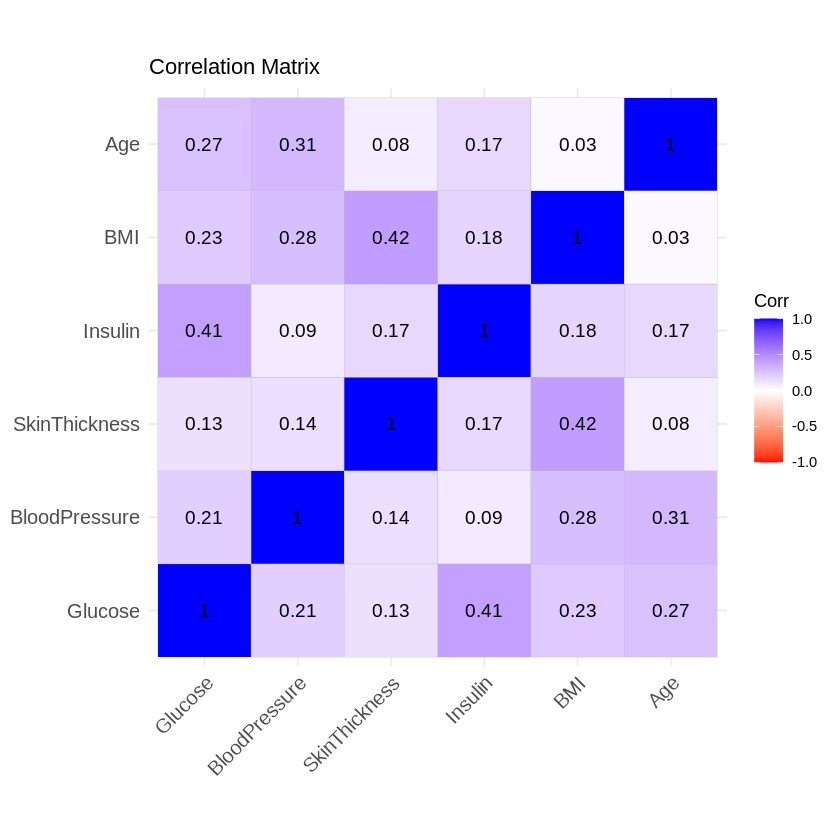

In [116]:
# this is the correlation matrix for numerical columns to see the relation between data features
cor_matrix <- cor(data1[numerical_columns], use = "complete.obs")

print(cor_matrix)

library(ggcorrplot)
ggcorrplot(cor_matrix, lab = TRUE, colors = c("red", "white", "blue"), title = "Correlation Matrix")


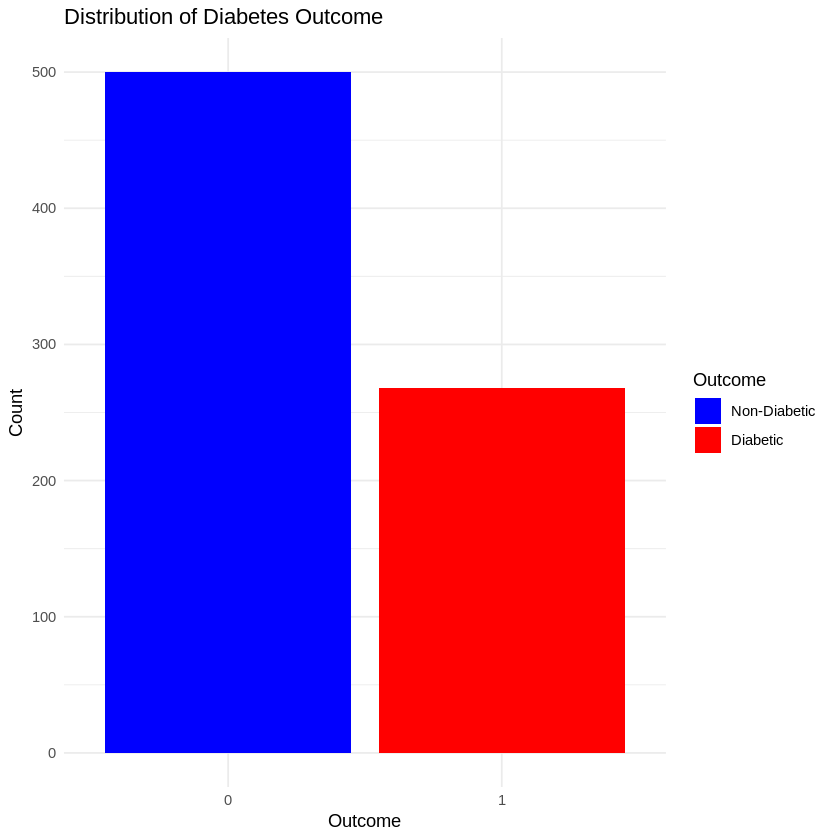

In [117]:
ggplot(data1, aes(x = as.factor(Outcome), fill = as.factor(Outcome))) +
  geom_bar() +
  scale_fill_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  labs(title = "Distribution of Diabetes Outcome", x = "Outcome", y = "Count", fill = "Outcome") +
  theme_minimal()

[1] "Average Glucose Levels (0 = Without Diabetes, 1 = With Diabetes):"
# A tibble: 2 × 2
  Outcome Average_Glucose
    <int>           <dbl>
1       0            111.
2       1            142.


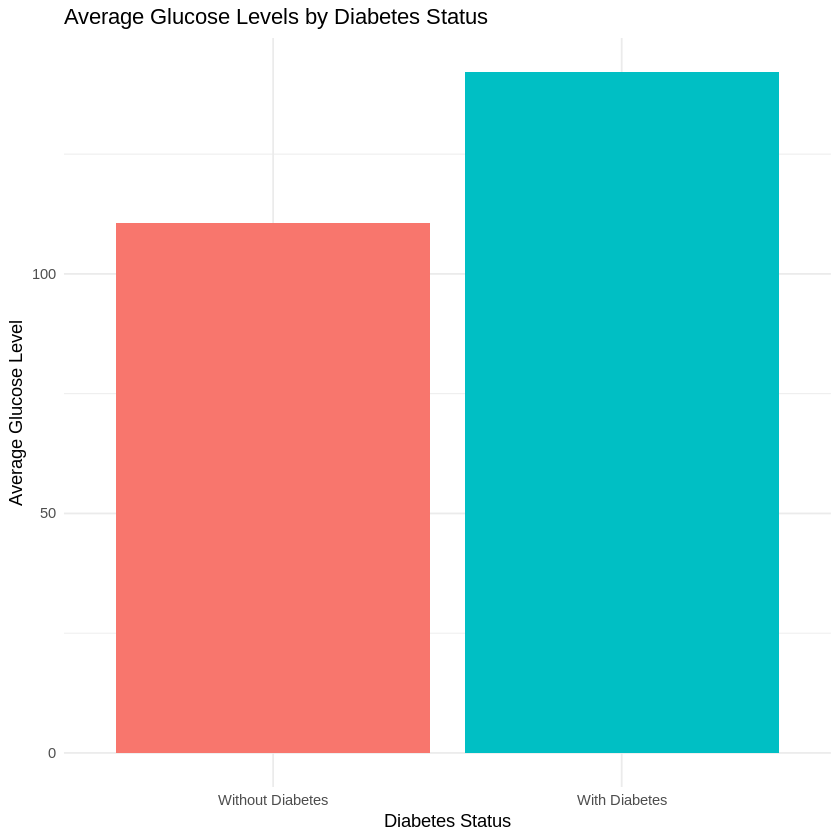

In [119]:
# 1. Average glucose levels among patients with and without diabetes
# Visualization: Average glucose levels by diabetes status
# This plot helps compare glucose levels among diabetic and non-diabetic patients
avg_glucose <- summarize(group_by(data1, Outcome), Average_Glucose = mean(Glucose, na.rm = TRUE))
print("Average Glucose Levels (0 = Without Diabetes, 1 = With Diabetes):")
print(avg_glucose)

ggplot(avg_glucose, aes(x = as.factor(Outcome), y = Average_Glucose, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average Glucose Levels by Diabetes Status",
       x = "Diabetes Status",
       y = "Average Glucose Level") +
  scale_x_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()



[1] "Average Age by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):"
# A tibble: 2 × 2
  Outcome Average_Age
    <int>       <dbl>
1       0        31.2
2       1        37.1


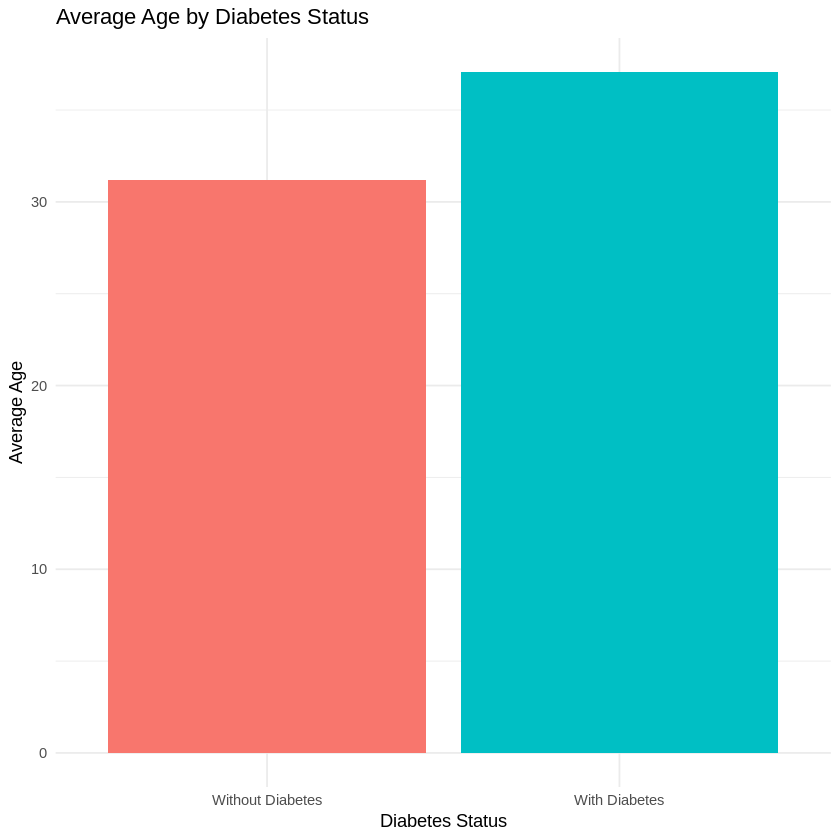

In [120]:
# 2. Average age of patients with and without diabetes
avg_age <- summarize(group_by(data1, Outcome), Average_Age = mean(Age, na.rm = TRUE))
print("Average Age by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):")
print(avg_age)


ggplot(avg_age, aes(x = as.factor(Outcome), y = Average_Age, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average Age by Diabetes Status",
       x = "Diabetes Status",
       y = "Average Age") +
  scale_x_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

[1] "Average Blood Pressure by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):"
# A tibble: 2 × 2
  Outcome Average_BP
    <int>      <dbl>
1       0       70.8
2       1       74.6


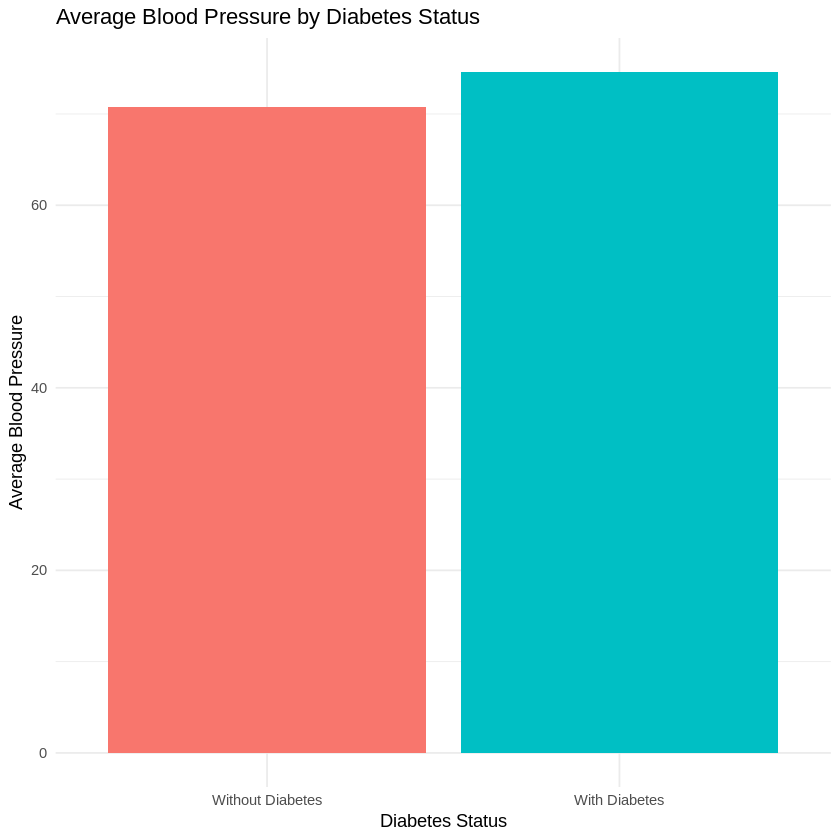

In [121]:
# 3. Average blood pressure measurements across groups
avg_bp <- summarize(group_by(data1, Outcome), Average_BP = mean(BloodPressure, na.rm = TRUE))
print("Average Blood Pressure by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):")
print(avg_bp)

ggplot(avg_bp, aes(x = as.factor(Outcome), y = Average_BP, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average Blood Pressure by Diabetes Status",
       x = "Diabetes Status",
       y = "Average Blood Pressure") +
  scale_x_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

[1] "Average BMI by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):"
# A tibble: 2 × 2
  Outcome Average_BMI
    <int>       <dbl>
1       0        30.9
2       1        35.2


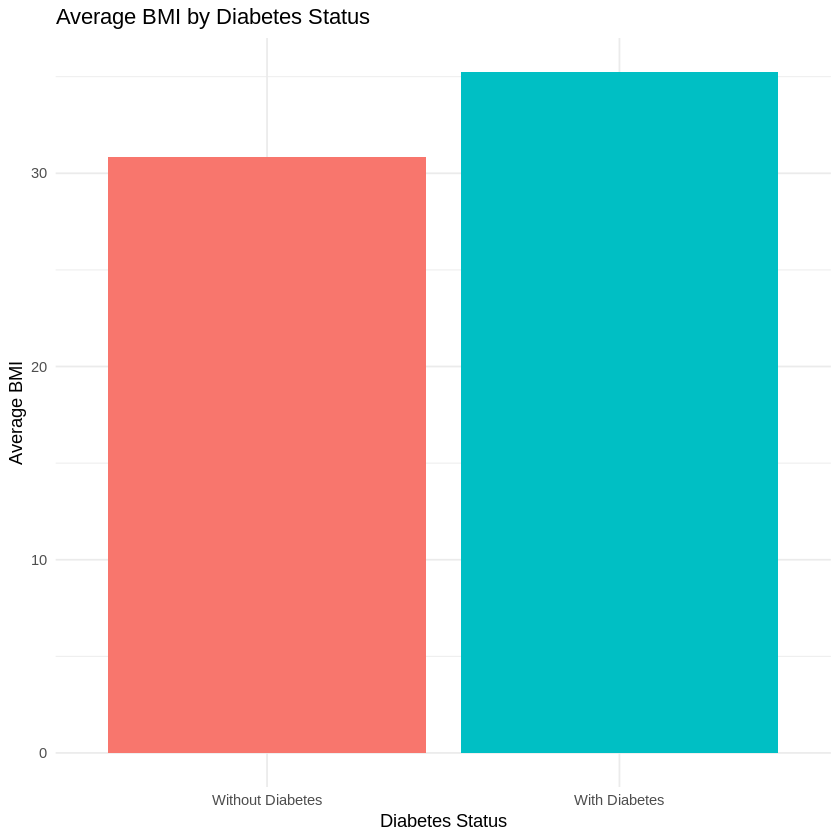

In [122]:
# 4. Average BMI of diabetic versus non-diabetic patients
avg_bmi <- summarize(group_by(data1, Outcome), Average_BMI = mean(BMI, na.rm = TRUE))
print("Average BMI by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):")
print(avg_bmi)

ggplot(avg_bmi, aes(x = as.factor(Outcome), y = Average_BMI, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average BMI by Diabetes Status",
       x = "Diabetes Status",
       y = "Average BMI") +
  scale_x_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

In [123]:
# 5. Rate of diabetes among patients in the dataset
rate_diabetes <- mean(data1[["Outcome"]]) * 100
print("Rate of Diabetes:")
print(paste(round(rate_diabetes, 2), "%", sep = ""))

[1] "Rate of Diabetes:"
[1] "34.9%"


In [124]:
# Function to simulate repeated sampling and visualize distribution of sample means
#This function generates multiple random samples, calculates their means, and visualizes the distribution of sample means
simulate_sample_means <- function(df, col, sample_size, num_samples, ax_limits, ax_title) {
  sample_means <- replicate(num_samples, mean(sample(df[[col]], sample_size, replace = TRUE), na.rm = TRUE))
  ggplot(data1.frame(sample_means), aes(x = sample_means)) +
    geom_histogram(bins = 30, color = "black", fill = "blue", alpha = 0.7) +
    labs(title = ax_title, x = "Sample Means", y = "Frequency") +
    xlim(ax_limits)
}

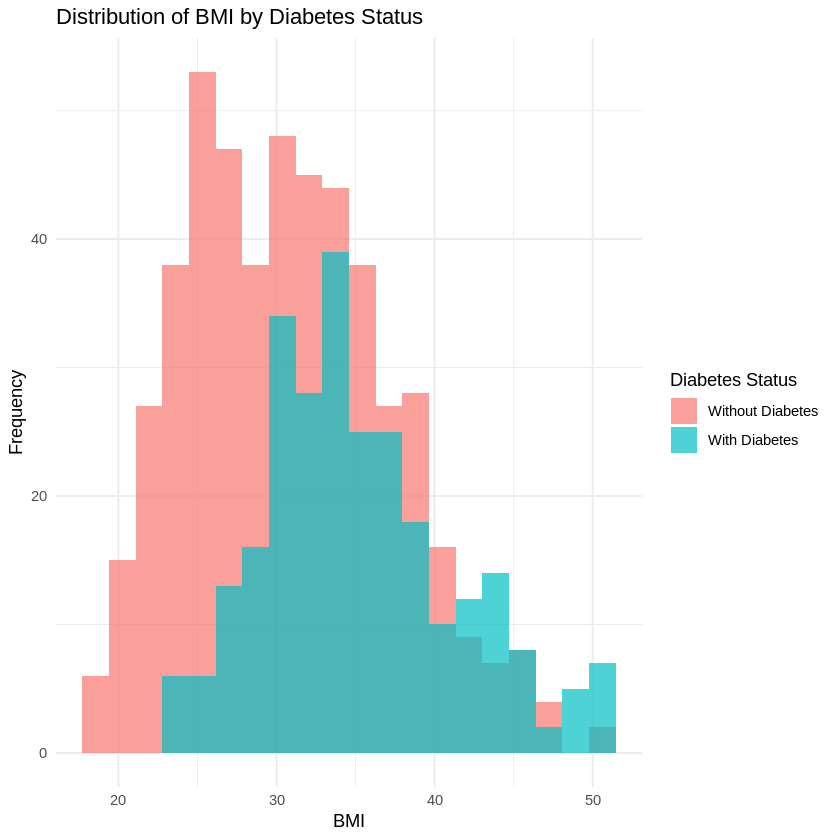

In [125]:
# 6. Distribution of BMI values among all patients
ggplot(data1, aes(x = BMI, fill = as.factor(Outcome))) +
  geom_histogram(bins = 20, alpha = 0.7, position = "identity") +
  labs(title = "Distribution of BMI by Diabetes Status",
       x = "BMI",
       y = "Frequency",
       fill = "Diabetes Status") +
  scale_fill_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

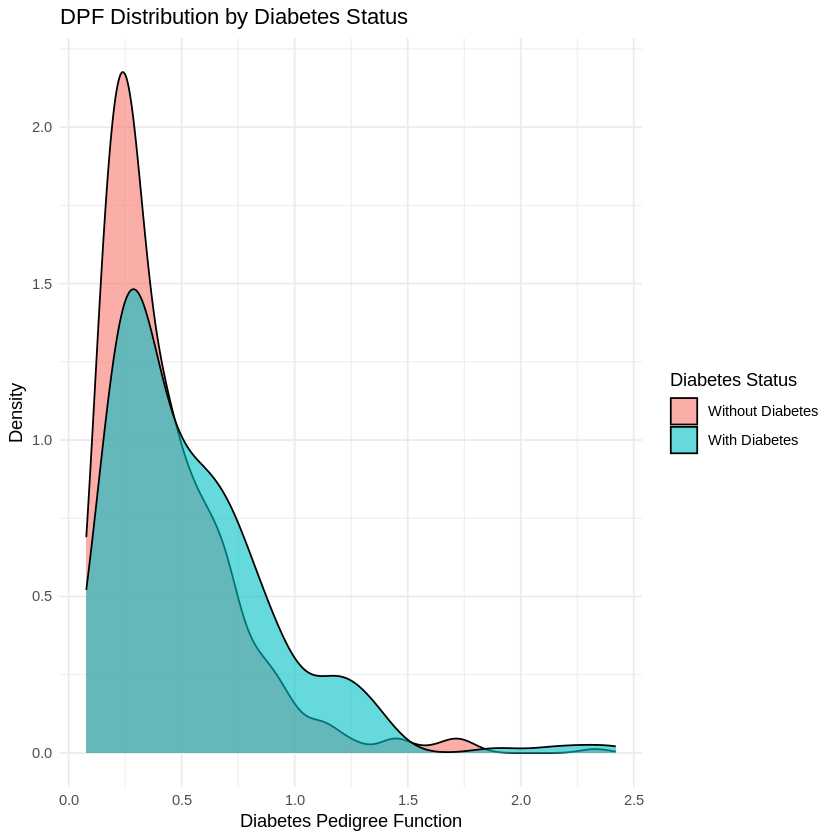

In [126]:
# 7. Distribution of Diabetes Pedigree Function (DPF) by groups
ggplot(data1, aes(x = DiabetesPedigreeFunction, fill = as.factor(Outcome))) +
  geom_density(alpha = 0.6) +
  labs(title = "DPF Distribution by Diabetes Status",
       x = "Diabetes Pedigree Function",
       y = "Density",
       fill = "Diabetes Status") +
  scale_fill_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

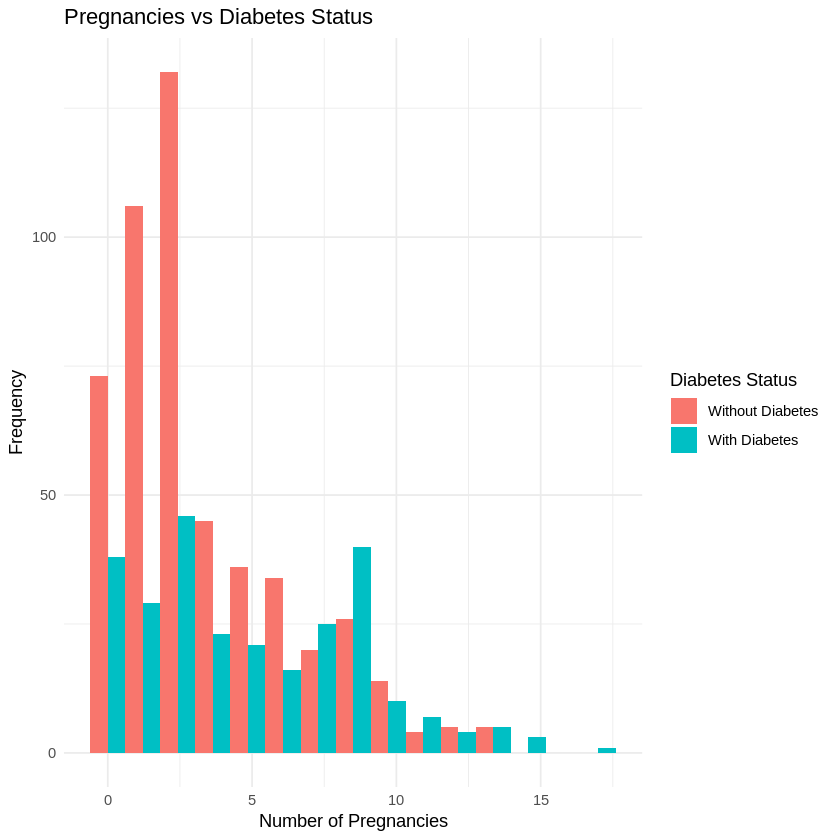

In [127]:
# 8. Relationship between pregnancies and diabetes occurrence
ggplot(data1, aes(x = Pregnancies, fill = as.factor(Outcome))) +
  geom_histogram(bins = 15, position = "dodge") +
  labs(title = "Pregnancies vs Diabetes Status",
       x = "Number of Pregnancies",
       y = "Frequency",
       fill = "Diabetes Status") +
  scale_fill_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()


[1] "Correlation between Glucose and BMI:"
[1] 0.23359


`geom_smooth()` using formula = 'y ~ x'


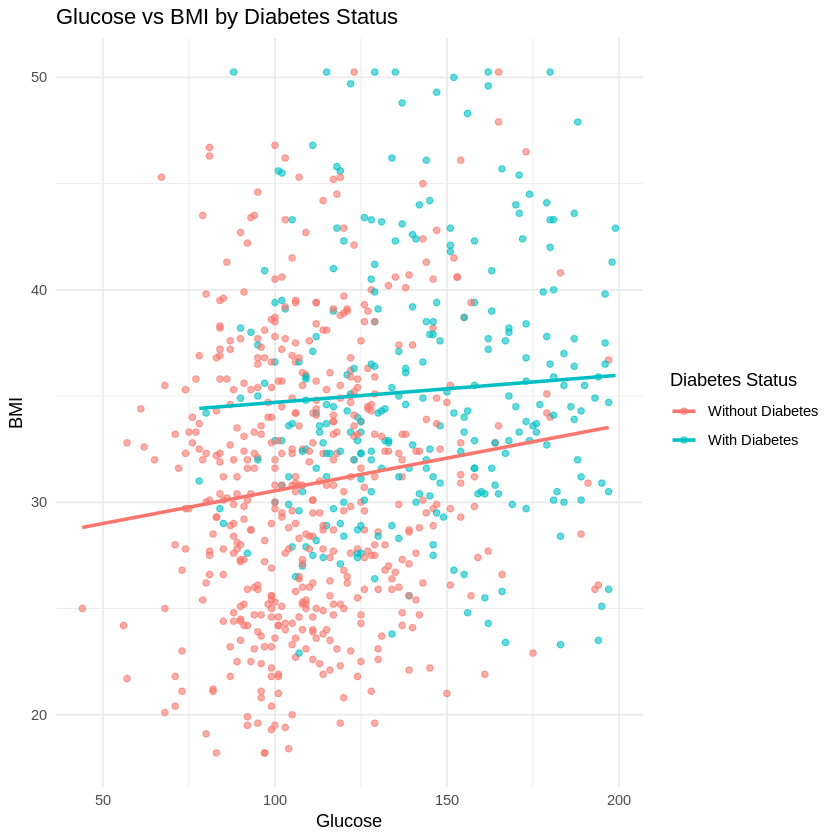

In [128]:
# 9. Correlation between glucose levels and BMI
cor_glucose_bmi <- cor(data1[["Glucose"]], data1[["BMI"]], use = "complete.obs")
print("Correlation between Glucose and BMI:")
print(cor_glucose_bmi)

ggplot(data1, aes(x = Glucose, y = BMI, color = as.factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Glucose vs BMI by Diabetes Status",
       x = "Glucose",
       y = "BMI",
       color = "Diabetes Status") +
  scale_color_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


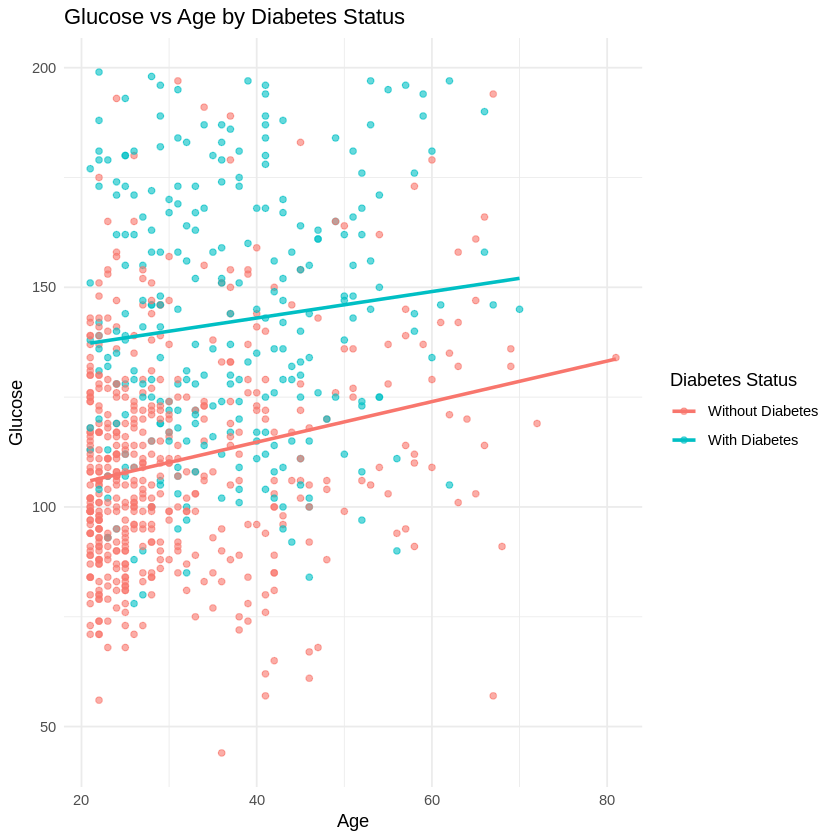

In [129]:
# 10. Trend of glucose levels with age by groups
ggplot(data1, aes(x = Age, y = Glucose, color = as.factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Glucose vs Age by Diabetes Status",
       x = "Age",
       y = "Glucose",
       color = "Diabetes Status") +
  scale_color_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()


In [130]:
# Save the summaries
write.csv(avg_glucose, "/content/avg_glucose.csv", row.names = FALSE)
write.csv(avg_age, "/content/avg_age.csv", row.names = FALSE)
write.csv(avg_bp, "/content/avg_bp.csv", row.names = FALSE)
write.csv(avg_bmi, "/content/avg_bmi.csv", row.names = FALSE)

print("Exploratory analysis complete.")


[1] "Exploratory analysis complete."


**PART 2: Answering Questions:**

  Outcome Mean_Glucose Median_Glucose SD_Glucose
1       0     110.6820          107.5   24.70720
2       1     142.1306          140.0   29.56884


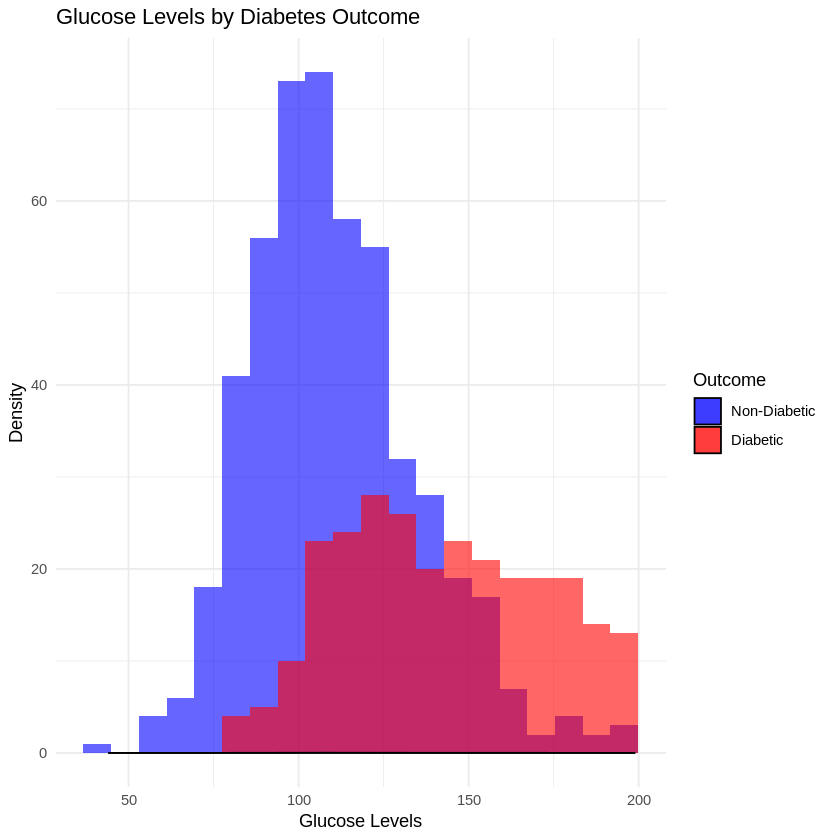

In [131]:
# 1: Are higher glucose levels associated with a greater likelihood of diabetes?
# Histogram with density for glucose levels by outcome

ggplot(data1, aes(x = Glucose, fill = factor(Outcome))) +
  geom_histogram(position = "identity", bins = 20, alpha = 0.6) +
  geom_density(alpha = 0.4) +
  scale_fill_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  labs(title = "Glucose Levels by Diabetes Outcome",
       x = "Glucose Levels", y = "Density",
       fill = "Outcome") +
  theme_minimal()

glucose_stats <- aggregate(data1[["Glucose"]],
                           by = list(Outcome = data1[["Outcome"]]),
                           FUN = function(x) c(mean = mean(x, na.rm = TRUE),
                                               median = median(x, na.rm = TRUE),
                                               sd = sd(x, na.rm = TRUE)))

glucose_stats <- data.frame(Outcome = glucose_stats[["Outcome"]],
                            Mean_Glucose = glucose_stats[["x"]][, "mean"],
                            Median_Glucose = glucose_stats[["x"]][, "median"],
                            SD_Glucose = glucose_stats[["x"]][, "sd"])

print(glucose_stats)
# plot clearly show that diabetic patients have
# significantly higher glucose levels than non-diabetic patients.

[1] "Correlation between Glucose and BMI: 0.23"


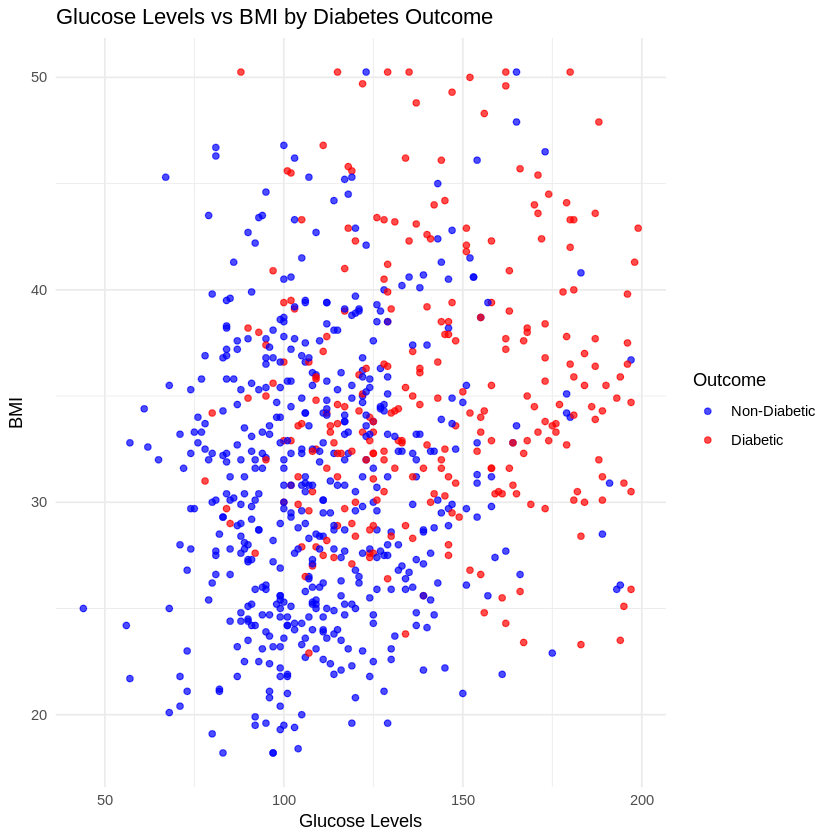

In [132]:
#2: Are patients with high glucose concentrations also likely to have higher BMI values?
# Scatter plot of Glucose vs BMI
ggplot(data1, aes(x = Glucose, y = BMI, color = factor(Outcome))) +
  geom_point(alpha = 0.7) +
  scale_color_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  labs(title = "Glucose Levels vs BMI by Diabetes Outcome",
       x = "Glucose Levels", y = "BMI",
       color = "Outcome") +
  theme_minimal()

correlation <- cor(data1[["Glucose"]], data1[["BMI"]], use = "complete.obs")
print(paste("Correlation between Glucose and BMI:", round(correlation, 2)))
# giving the 0.23 correlation
# Patients with higher glucose levels
# are more likely to have higher BMI values
# this is more common among diabetic patients.

  Outcome Mean_Pregnancies Median_Pregnancies SD_Pregnancies
1       0         3.298000                  2       3.017185
2       1         4.865672                  4       3.741239


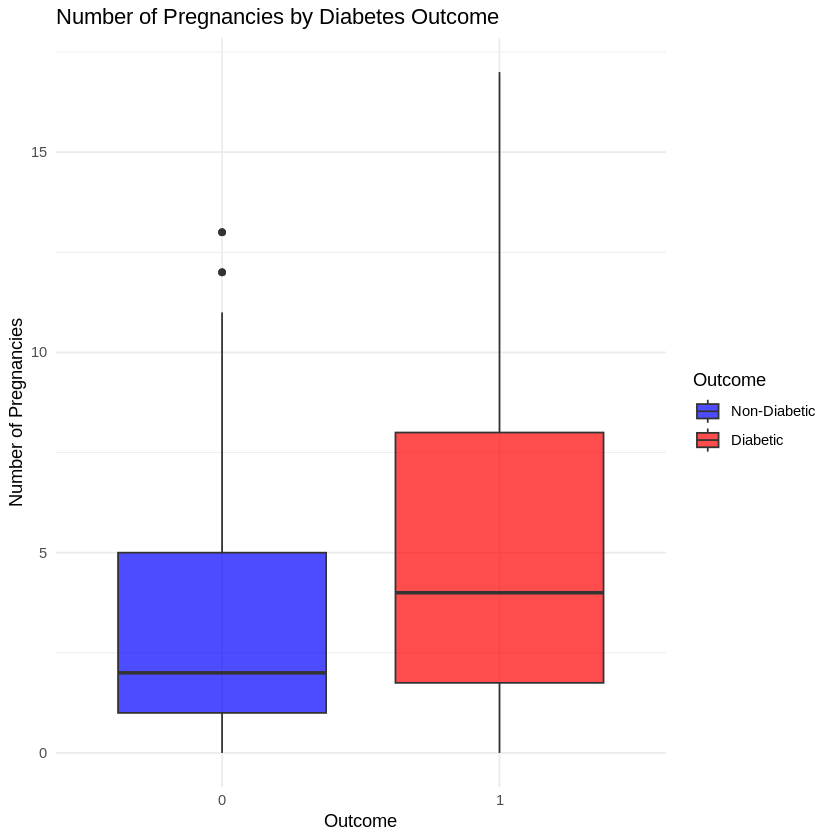

In [133]:
#3: Are patients with a higher number of pregnancies at greater risk of developing diabetes?
# Boxplot for number of pregnancies by outcome
# Boxplot for number of pregnancies by diabetes outcome
ggplot(data1, aes(x = factor(Outcome), y = Pregnancies, fill = factor(Outcome))) +
  geom_boxplot(alpha = 0.7) +
  scale_fill_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  labs(title = "Number of Pregnancies by Diabetes Outcome",
       x = "Outcome", y = "Number of Pregnancies",
       fill = "Outcome") +
  theme_minimal()

# Group by Outcome and summarize pregnancies statistics
pregnancies_stats <- aggregate(data1[["Pregnancies"]],
                                by = list(Outcome = data1[["Outcome"]]),
                                FUN = function(x) c(mean = mean(x, na.rm = TRUE),
                                                    median = median(x, na.rm = TRUE),
                                                    sd = sd(x, na.rm = TRUE)))
pregnancies_stats <- data.frame(Outcome = pregnancies_stats$Outcome,
                                Mean_Pregnancies = pregnancies_stats$x[, "mean"],
                                Median_Pregnancies = pregnancies_stats$x[, "median"],
                                SD_Pregnancies = pregnancies_stats$x[, "sd"])

print(pregnancies_stats)

# mean non diabetic : 3.30 , diabetic : 4.87
# Patients with diabetes tend to have a higher number of pregnancies
# giving a potential risk factor.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


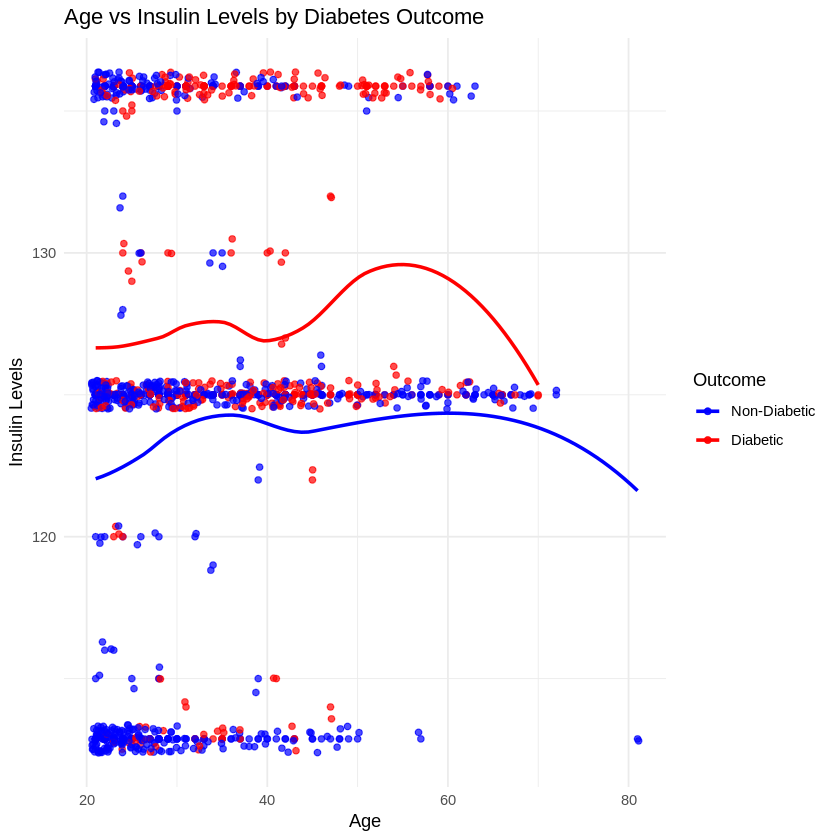

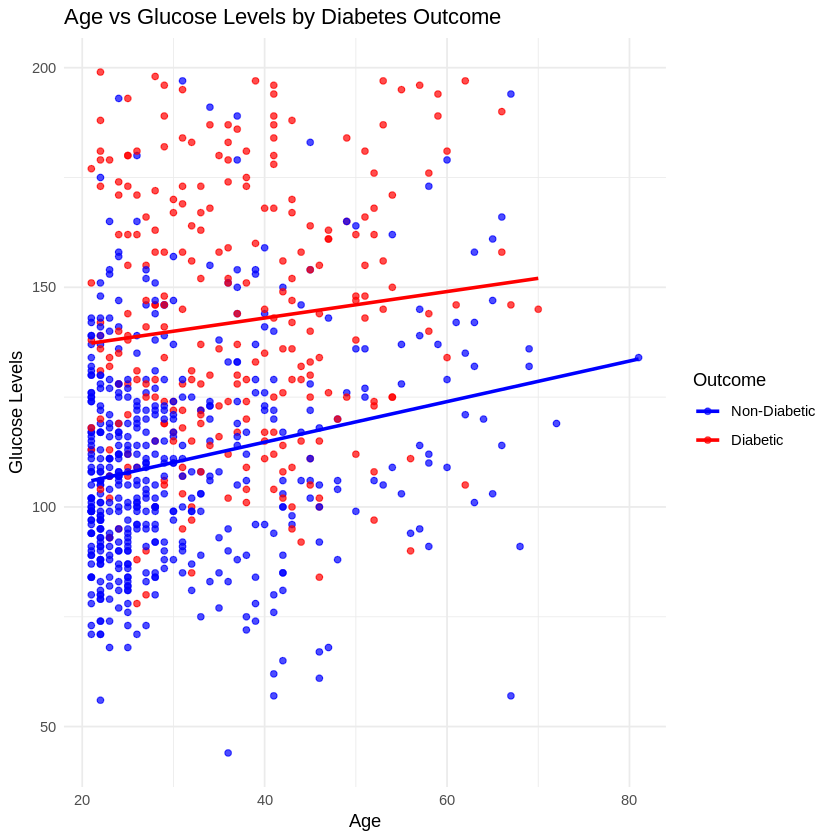

In [134]:
# 4: Are older patients more likely to have higher insulin concentrations and blood glucose levels?
# Scatter plot of Age vs Insulin
ggplot(data1, aes(x = Age, y = Insulin, color = factor(Outcome))) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "loess", se = FALSE) +
  geom_jitter(width = 0.5, height = 0.5, alpha = 0.7) +
  scale_color_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  labs(title = "Age vs Insulin Levels by Diabetes Outcome",
       x = "Age", y = "Insulin Levels",
       color = "Outcome") +
  theme_minimal()

ggplot(data1, aes(x = Age, y = Glucose, color = factor(Outcome))) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_color_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  labs(title = "Age vs Glucose Levels by Diabetes Outcome",
       x = "Age", y = "Glucose Levels",
       color = "Outcome") +
  theme_minimal()
# in insulin level : no pattern or trend with age
# in glucose Levels : older with diabetes have higher glucose levels

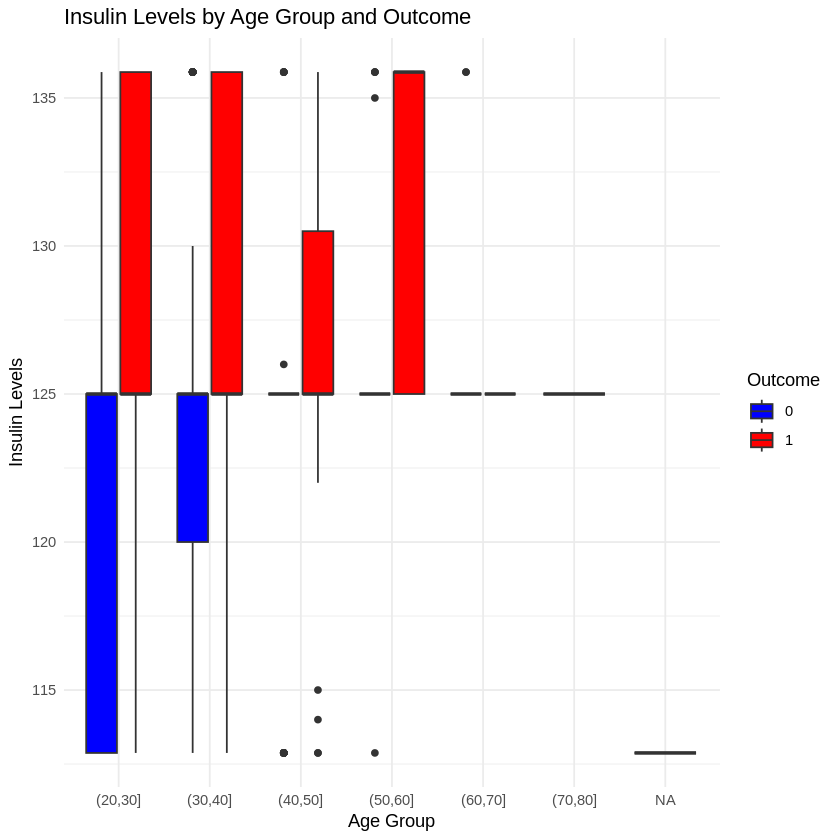

In [135]:
ggplot(data1, aes(x = factor(cut(Age, breaks = seq(20, 80, by = 10))), y = Insulin, fill = factor(Outcome))) +
  geom_boxplot() +
  scale_fill_manual(values = c("blue", "red")) +
  labs(title = "Insulin Levels by Age Group and Outcome",
       x = "Age Group", y = "Insulin Levels", fill = "Outcome") +
  theme_minimal()

Risk Profiles for Diabetic Patients:
Average Glucose Level: 142.13 
Average BMI: 35.24 
Average Age: 37.07 


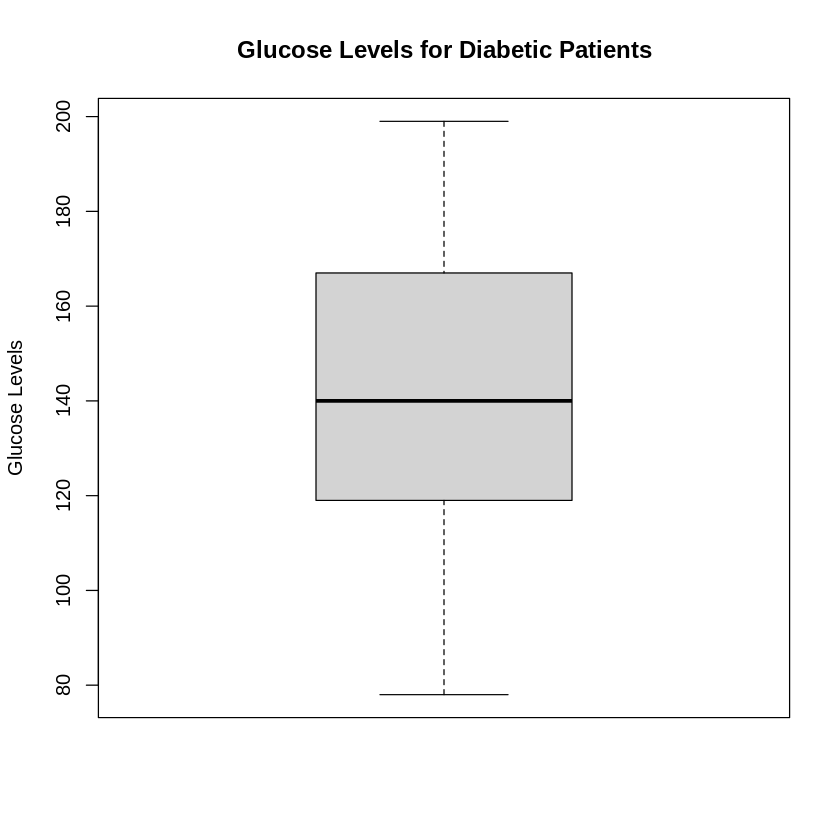

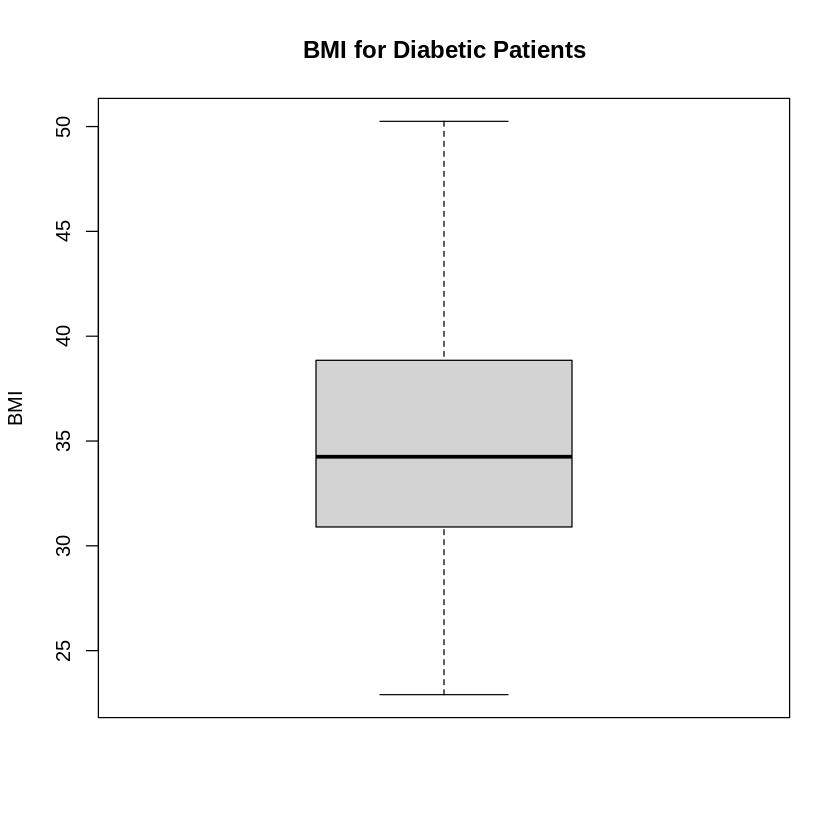

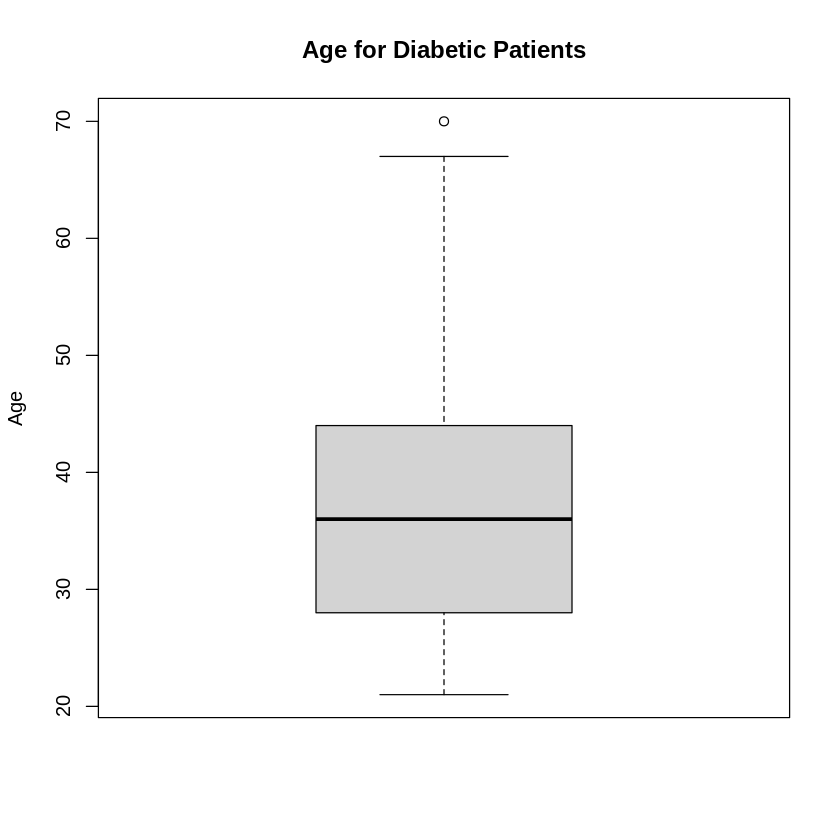

In [137]:
# 5: Can you identify common “risk profiles” for diabetic patients based on key metrics?
diabetic_data <- data1[data1[["Outcome"]] == 1, ]

mean_glucose <- mean(diabetic_data[["Glucose"]], na.rm = TRUE)
mean_bmi <- mean(diabetic_data[["BMI"]], na.rm = TRUE)
mean_age <- mean(diabetic_data[["Age"]], na.rm = TRUE)

cat("Risk Profiles for Diabetic Patients:\n")
cat("Average Glucose Level:", round(mean_glucose, 2), "\n")
cat("Average BMI:", round(mean_bmi, 2), "\n")
cat("Average Age:", round(mean_age, 2), "\n")

boxplot(diabetic_data[["Glucose"]], main = "Glucose Levels for Diabetic Patients", ylab = "Glucose Levels")
boxplot(diabetic_data[["BMI"]], main = "BMI for Diabetic Patients", ylab = "BMI")
boxplot(diabetic_data[["Age"]], main = "Age for Diabetic Patients", ylab = "Age")

# based on the calculations
# Average Glucose Level: 142.13
# Average BMI: 35.24
# Average Age: 37.07
# diabetic patients have high gluocose level and high bmi
# no specific pattern for the age but we can say that the are middle-aged
# follow the seccond cell plot for more better visualization

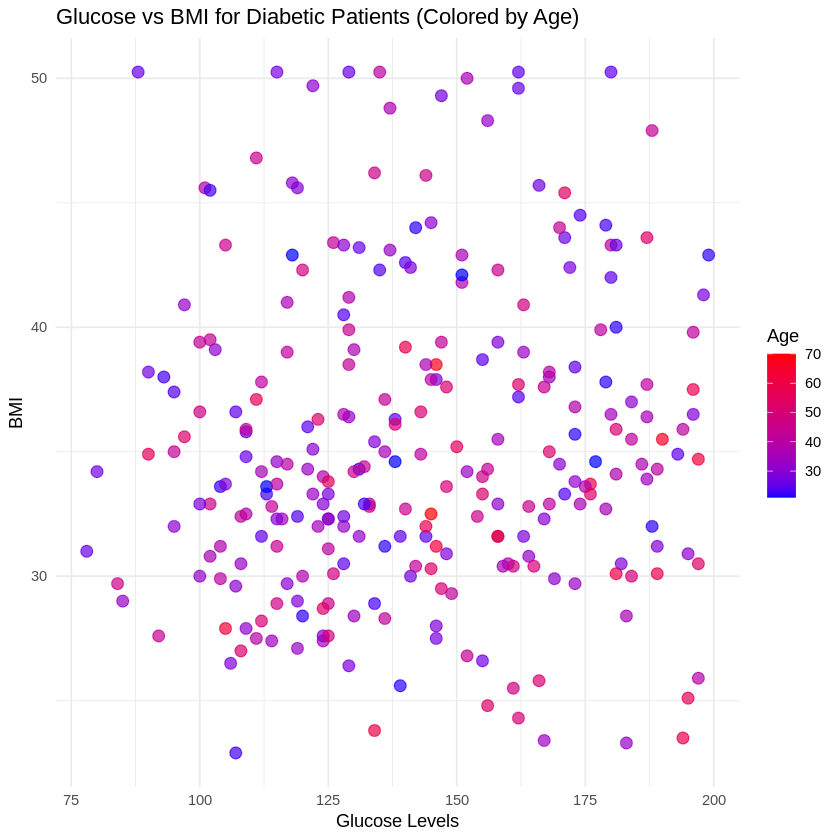

In [138]:
# Scatter plot of Glucose vs BMI for diabetic patients, colored by Age
ggplot(diabetic_data, aes(x = Glucose, y = BMI, color = Age)) +
  geom_point(alpha = 0.7, size = 3) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(title = "Glucose vs BMI for Diabetic Patients (Colored by Age)",
       x = "Glucose Levels", y = "BMI",
       color = "Age") +
  theme_minimal()
# here is more visual clear for the data
# age is has many colors but from the AVG it's middle

Analyzing relationship between BMI and insulin for diabetic patients:


`geom_smooth()` using formula = 'y ~ x'


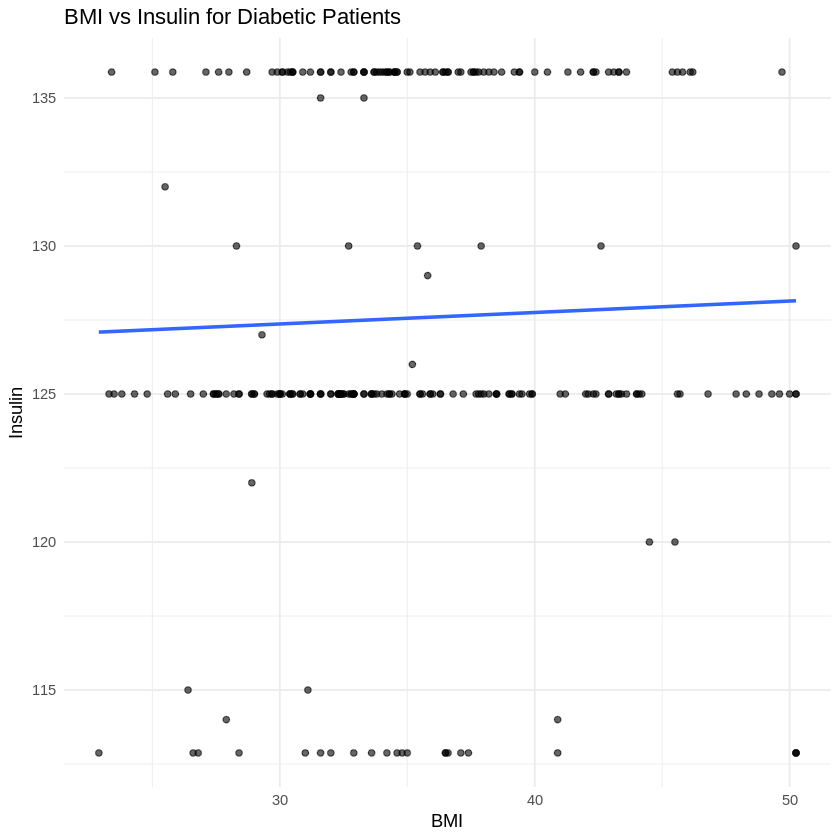

In [139]:
# 1. What is the relationship between BMI and insulin concentrations among diabetic patients?
# Relationship between BMI and insulin concentrations for diabetic patients
# This plot helps identify patterns between BMI and insulin concentrations
# This scatterplot and regression line illustrate the relationship between BMI and insulin concentrations for diabetic patients
cat("Analyzing relationship between BMI and insulin for diabetic patients:\n")
bmi_insulin_plot <- ggplot(filter(data1, Outcome == 1), aes(x = BMI, y = Insulin)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "BMI vs Insulin for Diabetic Patients",
       x = "BMI",
       y = "Insulin") +
  theme_minimal()
print(bmi_insulin_plot)
# diabetic patients with higher BMI tend to have higher insulin levels
# so insuline resistance and BMI may be associated

Analyzing diabetes rates for younger vs older patients:


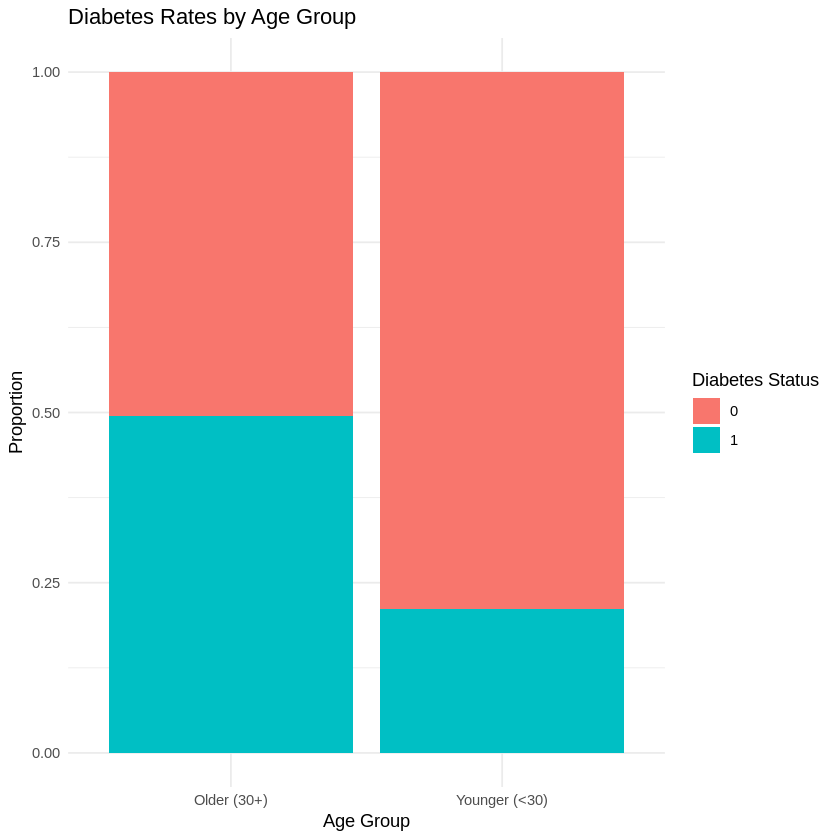

In [140]:
# 2.what is diabetes rates for younger vs older patients?
# this plot visualizes the proportion of diabetic and non-diabetic patients in two age groups: younger (<30) and older (30+)
cat("Analyzing diabetes rates for younger vs older patients:\n")
data1[["AgeGroup"]] <- ifelse(data1[["Age"]] < 30, "Younger (<30)", "Older (30+)")
age_group_plot <- ggplot(data1, aes(x = AgeGroup, fill = as.factor(Outcome))) +
  geom_bar(position = "fill") +
  labs(title = "Diabetes Rates by Age Group",
       x = "Age Group",
       y = "Proportion",
       fill = "Diabetes Status") +
  theme_minimal()
print(age_group_plot)
# older patients (30+) showing a much higher likelihood of having diabetes compared to younger patients.

Analyzing DPF variation across age groups:


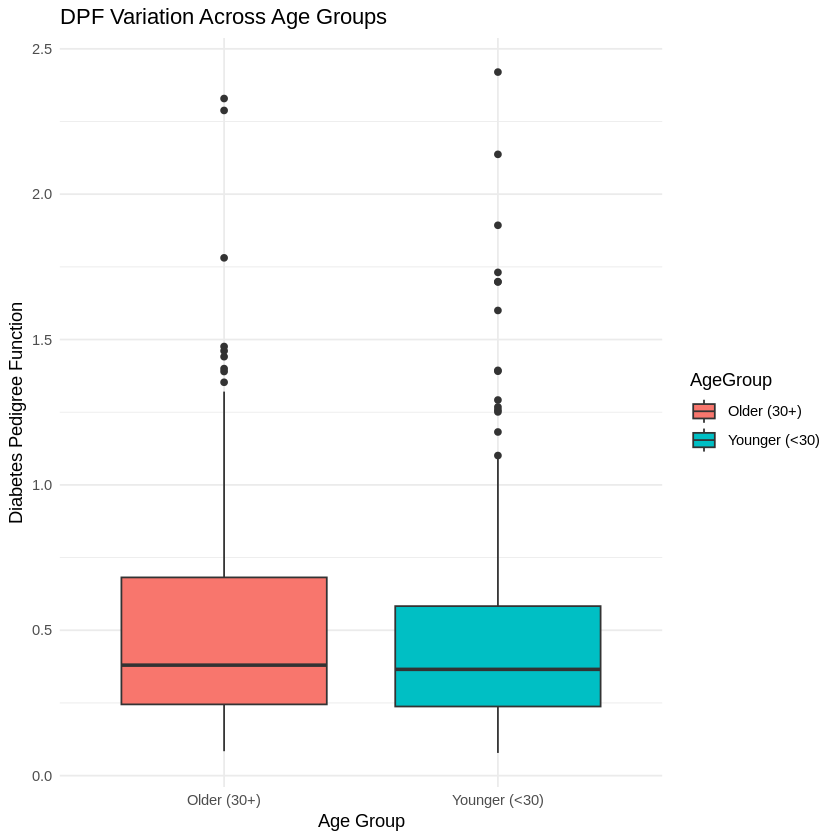

In [141]:
# 3.what Diabetes Pedigree Function (DPF) variation across age groups ?
cat("Analyzing DPF variation across age groups:\n")
dpf_age_plot <- ggplot(data1, aes(x = AgeGroup, y = DiabetesPedigreeFunction)) +
  geom_boxplot(aes(fill = AgeGroup)) +
  labs(title = "DPF Variation Across Age Groups",
       x = "Age Group",
       y = "Diabetes Pedigree Function") +
  theme_minimal()
print(dpf_age_plot)
# with the higher range and a higher median DPF for younger
# it's more for the family history
# for older , it's more age related or life factors

In [151]:
colnames(data1)

[1] "Pregnancies"              "Glucose"                 
 [3] "BloodPressure"            "SkinThickness"           
 [5] "Insulin"                  "BMI"                     
 [7] "DiabetesPedigreeFunction" "Age"                     
 [9] "Outcome"                  "AgeGroup"

Analyzing difference in BMI for patients with and without diabetes:
T-test results for BMI:

	Welch Two Sample t-test

data:  BMI by Outcome
t = -9.2491, df = 569.16, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -5.301533 -3.444264
sample estimates:
mean in group 0 mean in group 1 
        30.8674         35.2403 



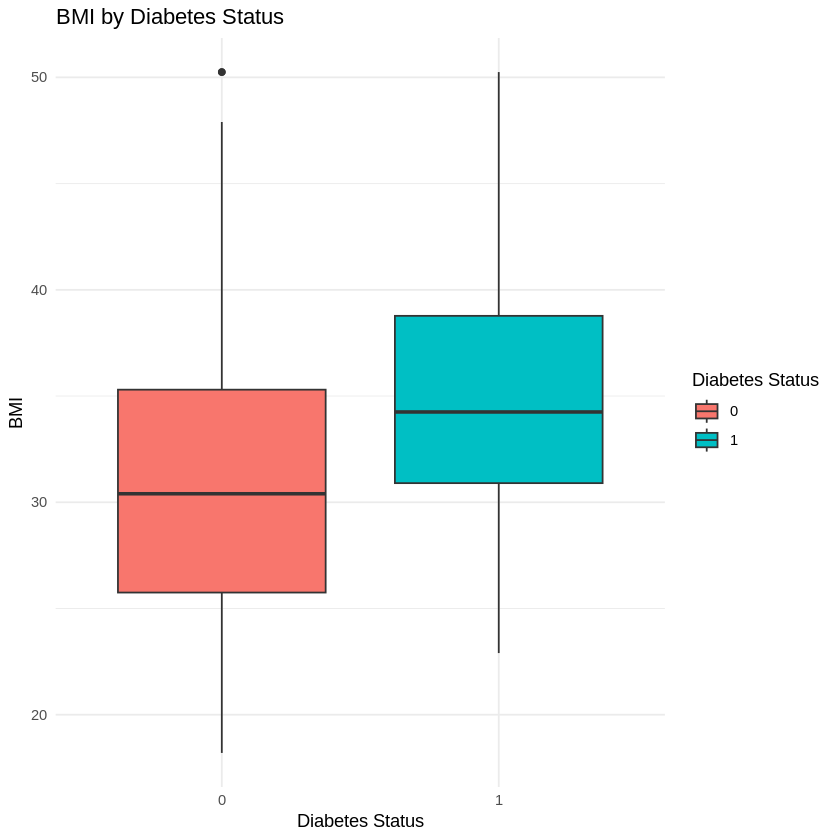

In [152]:
# 4. what is the Difference in BMI for patients with and without diabetes?
cat("Analyzing difference in BMI for patients with and without diabetes:\n")
bmi_boxplot <- ggplot(data1, aes(x = as.factor(Outcome), y = BMI, fill = as.factor(Outcome))) +
  geom_boxplot() +
  labs(title = "BMI by Diabetes Status",
       x = "Diabetes Status",
       y = "BMI",
       fill = "Diabetes Status") +
  theme_minimal()
print(bmi_boxplot)

# Perform a T-test for BMI by diabetes status
ttest_bmi <- t.test(BMI ~ Outcome, data = data1)
cat("T-test results for BMI:\n")
print(ttest_bmi)
# higher BMI is strongly associated with diabetes
# the t-test confirms that diabetic patients have significantly higher BMI values on average than non-diabetic patient
# with p value far less than 0.05 the difference is relly significant .

Analyzing relationship between blood pressure and glucose levels:


`geom_smooth()` using formula = 'y ~ x'


Correlation between blood pressure and glucose levels: 0.2084142 
[1] "Part 2 analysis complete."


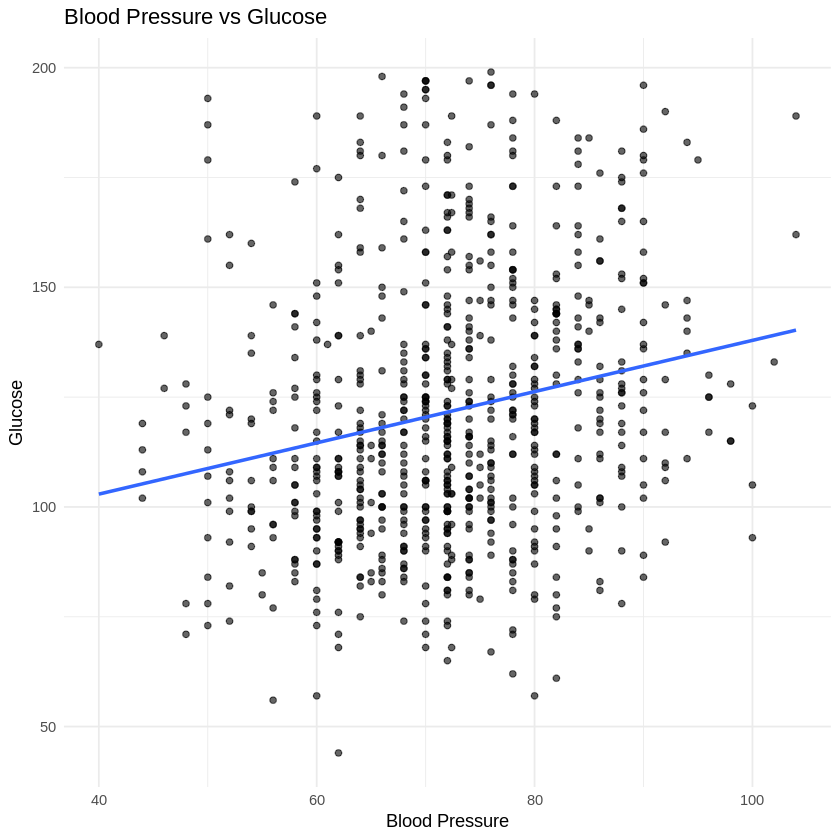

In [143]:
# 5.what is the relationship between blood pressure and glucose levels?
cat("Analyzing relationship between blood pressure and glucose levels:\n")
bp_glucose_plot <- ggplot(data1, aes(x = BloodPressure, y = Glucose)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Blood Pressure vs Glucose",
       x = "Blood Pressure",
       y = "Glucose") +
  theme_minimal()
print(bp_glucose_plot)

correlation_bp_glucose <- cor(data1[["BloodPressure"]], data1[["Glucose"]], use = "complete.obs")
cat("Correlation between blood pressure and glucose levels:", correlation_bp_glucose, "\n")

print("Part 2 analysis complete.")
# actually , duo to the small and weak positive trend
# blood presure is not strong related or predictor of glucode level .

**PART 3: Hypothesis Testing:**

In [144]:
# 3.1 Hypothesis Test: Claim - Significant difference in glucose levels between diabetic and non-diabetic patients

# state the test and hypotheses
cat("\nHypothesis Test: Significant Difference in Glucose Levels\n")
cat("Test: Two-sample t-test (assumes unequal variances)\n")
cat("Null Hypothesis (H0): There is no significant difference in glucose levels between diabetic and non-diabetic patients.\n")
cat("Alternative Hypothesis (H1): There is a significant difference in glucose levels between diabetic and non-diabetic patients.\n")

# pperform the test
test_result <- t.test(data1[["Glucose"]][data1[["Outcome"]] == 0], data1[["Glucose"]][data1[["Outcome"]] == 1], var.equal = FALSE)
# report the result
cat("Test Statistic:", test_result[["statistic"]], "\n")
cat("Degrees of Freedom:", test_result[["parameter"]], "\n")
cat("p-value:", test_result[["p.value"]], "\n")

# make a conclusion
alpha <- 0.05
if (test_result[["p.value"]] < alpha) {
  cat("Conclusion: Reject the null hypothesis (H0). There is a significant difference in glucose levels between diabetic and non-diabetic patients.\n")
} else {
  cat("Conclusion: Fail to reject the null hypothesis (H0). No significant difference in glucose levels between diabetic and non-diabetic patients.\n")
}


Hypothesis Test: Significant Difference in Glucose Levels
Test: Two-sample t-test (assumes unequal variances)
Null Hypothesis (H0): There is no significant difference in glucose levels between diabetic and non-diabetic patients.
Alternative Hypothesis (H1): There is a significant difference in glucose levels between diabetic and non-diabetic patients.
Test Statistic: -14.85265 
Degrees of Freedom: 469.0829 
p-value: 3.542149e-41 
Conclusion: Reject the null hypothesis (H0). There is a significant difference in glucose levels between diabetic and non-diabetic patients.


In [145]:
# 3.2 Hypothesis Test: Custom Claim - Significant difference in BMI between diabetic and non-diabetic patients

# state the test and hypotheses
cat("\nHypothesis Test: Significant Difference in BMI\n")
cat("Test: Two-sample t-test (assumes unequal variances)\n")
cat("Null Hypothesis (H0): There is no significant difference in BMI between diabetic and non-diabetic patients.\n")
cat("Alternative Hypothesis (H1): There is a significant difference in BMI between diabetic and non-diabetic patients.\n")

# performing the test
test_result_bmi <- t.test(data1[["BMI"]][data1[["Outcome"]] == 0], data1[["BMI"]][data1[["Outcome"]] == 1], var.equal = FALSE)

# report the result
cat("Test Statistic:", test_result_bmi[["statistic"]], "\n")
cat("Degrees of Freedom:", test_result_bmi[["parameter"]], "\n")
cat("p-value:", test_result_bmi[["p.value"]], "\n")

# make a conclusion
alpha <- 0.05
if (test_result_bmi[["p.value"]] < alpha) {
  cat("Conclusion: Reject the null hypothesis (H0). There is a significant difference in BMI between diabetic and non-diabetic patients.\n")
} else {
  cat("Conclusion: Fail to reject the null hypothesis (H0). No significant difference in BMI between diabetic and non-diabetic patients.\n")
}

print("Hypothesis Testing Complete.")



Hypothesis Test: Significant Difference in BMI
Test: Two-sample t-test (assumes unequal variances)
Null Hypothesis (H0): There is no significant difference in BMI between diabetic and non-diabetic patients.
Alternative Hypothesis (H1): There is a significant difference in BMI between diabetic and non-diabetic patients.
Test Statistic: -9.249051 
Degrees of Freedom: 569.1649 
p-value: 4.523364e-19 
Conclusion: Reject the null hypothesis (H0). There is a significant difference in BMI between diabetic and non-diabetic patients.
[1] "Hypothesis Testing Complete."


**PART 4: Simulation Task:**

In [146]:
# 4.1 take 25 Random Samples of Size 15 from the Dataset
# select a column (Glucose)
selected_column <- data1[["Glucose"]]
population_mean <- mean(selected_column, na.rm = TRUE)
sd_population <- sd(selected_column, na.rm = TRUE)

cat("Population Mean:", population_mean, "\n")

# initialize variables to store results
sample_means_15 <- c()
ci_coverage_15 <- 0

set.seed(123) # for reproducibility
# using loops
for (i in 1:25) {
  # sample_data should now be a numeric vector
  sample_data <- sample(selected_column, size = 15, replace = FALSE)
  sample_mean <- mean(sample_data)
  sample_se <- sd(sample_data) / sqrt(15)
  ci_lower <- sample_mean - qnorm(0.975) * sample_se
  ci_upper <- sample_mean + qnorm(0.975) * sample_se
  sample_means_15 <- append(sample_means_15, sample_mean)

  # check if the population mean is within the confidence interval or not
  if (population_mean >= ci_lower && population_mean <= ci_upper) {
    ci_coverage_15 <- ci_coverage_15 + 1
  }
  cat("Sample", i, "CI:", ci_lower, "-", ci_upper, "\n")
}

coverage_proportion_15 <- ci_coverage_15 / 25
cat("\nProportion of Confidence Intervals Containing the Population Mean (Size 15):", coverage_proportion_15, "\n")

Population Mean: 121.6562 
Sample 1 CI: 101.379 - 140.4876 
Sample 2 CI: 89.31737 - 120.5493 
Sample 3 CI: 115.511 - 146.7556 
Sample 4 CI: 109.8002 - 140.5998 
Sample 5 CI: 105.2233 - 137.7101 
Sample 6 CI: 111.3959 - 141.1374 
Sample 7 CI: 120.9477 - 144.119 
Sample 8 CI: 112.8329 - 145.0338 
Sample 9 CI: 101.2566 - 137.4101 
Sample 10 CI: 100.1283 - 121.605 
Sample 11 CI: 104.904 - 139.3626 
Sample 12 CI: 102.8557 - 137.1443 
Sample 13 CI: 107.2368 - 139.2965 
Sample 14 CI: 111.2628 - 142.0706 
Sample 15 CI: 104.1155 - 128.9512 
Sample 16 CI: 109.6583 - 147.0083 
Sample 17 CI: 101.8651 - 138.2682 
Sample 18 CI: 106.3533 - 126.0467 
Sample 19 CI: 101.5705 - 121.3628 
Sample 20 CI: 114.5743 - 147.6924 
Sample 21 CI: 99.17676 - 120.9566 
Sample 22 CI: 99.33502 - 130.265 
Sample 23 CI: 120.6746 - 135.8587 
Sample 24 CI: 99.68951 - 133.3772 
Sample 25 CI: 103.3252 - 137.8748 

Proportion of Confidence Intervals Containing the Population Mean (Size 15): 0.84 


In [147]:
# 4.2 Increase the Sample Size to 100

# initialize variables to store results
sample_means_100 <- c()
ci_coverage_100 <- 0

for (i in 1:25) {
  sample_data <- sample(selected_column, size = 100, replace = FALSE)
  sample_mean <- mean(sample_data)
  sample_se <- sd(sample_data) / sqrt(100)
  ci_lower <- sample_mean - qnorm(0.975) * sample_se
  ci_upper <- sample_mean + qnorm(0.975) * sample_se
  sample_means_100 <- append(sample_means_100, sample_mean)

  # check if the population mean is within the confidence interval or not
  if (population_mean >= ci_lower && population_mean <= ci_upper) {
    ci_coverage_100 <- ci_coverage_100 + 1
  }
  cat("Sample", i, "CI:", ci_lower, "-", ci_upper, "\n")
}

coverage_proportion_100 <- ci_coverage_100 / 25
cat("\nProportion of Confidence Intervals Containing the Population Mean (Size 100):", coverage_proportion_100, "\n")

Sample 1 CI: 115.9886 - 127.2914 
Sample 2 CI: 117.8915 - 130.0885 
Sample 3 CI: 115.9374 - 128.1026 
Sample 4 CI: 115.8709 - 128.4091 
Sample 5 CI: 115.5207 - 125.9993 
Sample 6 CI: 113.4441 - 124.4959 
Sample 7 CI: 114.2881 - 125.9319 
Sample 8 CI: 110.9328 - 122.9072 
Sample 9 CI: 114.438 - 125.002 
Sample 10 CI: 116.1906 - 129.1094 
Sample 11 CI: 112.0902 - 124.7098 
Sample 12 CI: 113.5788 - 124.7012 
Sample 13 CI: 110.2286 - 120.2314 
Sample 14 CI: 115.9236 - 127.7964 
Sample 15 CI: 115.948 - 127.512 
Sample 16 CI: 122.3501 - 134.3099 
Sample 17 CI: 111.5382 - 123.3618 
Sample 18 CI: 115.1658 - 127.8342 
Sample 19 CI: 115.3792 - 127.2408 
Sample 20 CI: 118.1854 - 128.0946 
Sample 21 CI: 115.0904 - 126.9096 
Sample 22 CI: 117.9243 - 129.6757 
Sample 23 CI: 120.2053 - 131.9147 
Sample 24 CI: 115.6767 - 127.2633 
Sample 25 CI: 114.9199 - 127.3401 

Proportion of Confidence Intervals Containing the Population Mean (Size 100): 0.92 


In [148]:
# 4.3 Take 20 Random Samples of Size 10 from the Dataset

# initialize variables to store the results
sample_means_10 <- c()
ci_coverage_10 <- 0

for (i in 1:20) {
  sample_data <- sample(selected_column, size = 10, replace = FALSE)
  sample_mean <- mean(sample_data)
  sample_se <- sd(sample_data) / sqrt(10)
  ci_lower <- sample_mean - qnorm(0.975) * sample_se
  ci_upper <- sample_mean + qnorm(0.975) * sample_se
  sample_means_10 <- append(sample_means_10, sample_mean)

  # check if the population mean is within the confidence interval or not
  if (population_mean >= ci_lower && population_mean <= ci_upper) {
    ci_coverage_10 <- ci_coverage_10 + 1
  }
  cat("Sample", i, "CI:", ci_lower, "-", ci_upper, "\n")
}

coverage_proportion_10 <- ci_coverage_10 / 20
cat("\nProportion of Confidence Intervals Containing the Population Mean (Size 10):", coverage_proportion_10, "\n")

Sample 1 CI: 120.7412 - 160.0588 
Sample 2 CI: 98.44749 - 124.1525 
Sample 3 CI: 106.0208 - 145.9792 
Sample 4 CI: 91.75984 - 123.2402 
Sample 5 CI: 94.89642 - 130.5036 
Sample 6 CI: 98.00242 - 141.1976 
Sample 7 CI: 97.14624 - 140.2538 
Sample 8 CI: 103.5982 - 141.4018 
Sample 9 CI: 98.92896 - 138.471 
Sample 10 CI: 100.5229 - 134.6771 
Sample 11 CI: 84.42802 - 127.972 
Sample 12 CI: 93.09375 - 143.3062 
Sample 13 CI: 107.3841 - 143.2159 
Sample 14 CI: 101.379 - 146.421 
Sample 15 CI: 102.0706 - 151.5294 
Sample 16 CI: 102.2245 - 130.7755 
Sample 17 CI: 111.5732 - 141.2268 
Sample 18 CI: 102.7049 - 131.0951 
Sample 19 CI: 103.859 - 135.741 
Sample 20 CI: 101.8692 - 130.5308 

Proportion of Confidence Intervals Containing the Population Mean (Size 10): 1 


In [149]:
# Summary of Findings
cat("\n--- Summary of Findings ---\n")
cat("Sample Size 15: Coverage Proportion:", coverage_proportion_15, "\n")
cat("Sample Size 100: Coverage Proportion:", coverage_proportion_100, "\n")
cat("Sample Size 10: Coverage Proportion:", coverage_proportion_10, "\n")

cat("\nObserve the behavior of confidence intervals: Larger sample sizes result in narrower confidence intervals and higher accuracy.")


--- Summary of Findings ---
Sample Size 15: Coverage Proportion: 0.84 
Sample Size 100: Coverage Proportion: 0.92 
Sample Size 10: Coverage Proportion: 1 

Observe the behavior of confidence intervals: Larger sample sizes result in narrower confidence intervals and higher accuracy.